In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Seunlek\Downloads\covid 19\Covid 19 Confirmed Cases-Kerala.csv')

# Display the first few rows of the dataset
df.head()


,Date,Confirmed
0,2020-01-31,0.0
1,2020-02-01,0.0
2,2020-02-02,1.0
3,2020-02-03,1.0
4,2020-02-04,0.0


In [2]:
# Display basic statistics
df.describe()


,Confirmed
count,841.000000
mean,7788.395957
std,10295.657109
min,0.000000
25%,438.000000
50%,4470.000000
75%,9445.000000
max,55475.000000


In [3]:
# Check for missing values
df.isnull().sum()


Date         0
Confirmed    0
dtype: int64

In [4]:
# Convert the 'date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the data types of the columns
df.dtypes


Date         datetime64[ns]
Confirmed           float64
dtype: object

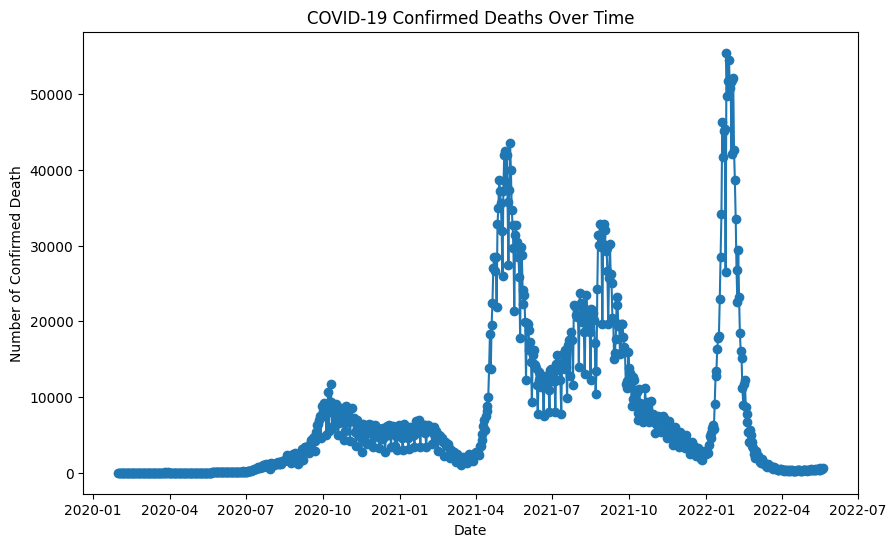

In [9]:
import matplotlib.pyplot as plt

# Plot the number of confirmed deaths over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Confirmed'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Death')
plt.title('COVID-19 Confirmed Deaths Over Time')
plt.grid(False)
plt.show()


In [12]:
# Calculate the 7-day moving average of confirmed deaths
df['7_day_moving_avg'] = df['Confirmed'].rolling(window=7).mean()
df['7_day_moving_avg']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
836    416.714286
837    432.000000
838    444.571429
839    464.142857
840    469.142857
Name: 7_day_moving_avg, Length: 841, dtype: float64

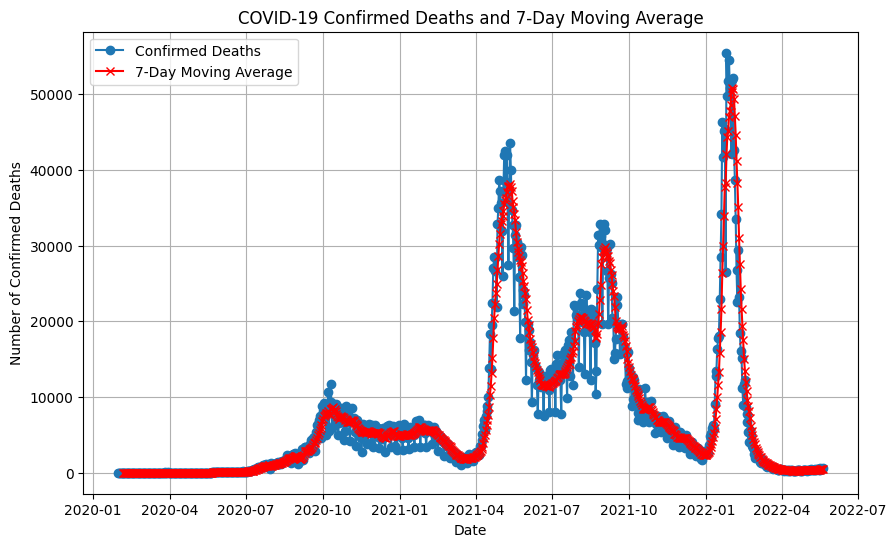

In [14]:
# Calculate the 7-day moving average of confirmed deaths
df['7_day_moving_avg'] = df['Confirmed'].rolling(window=7).mean()

# Plot the original and moving average data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Confirmed'], marker='o', linestyle='-', label='Confirmed Deaths')
plt.plot(df['Date'], df['7_day_moving_avg'], marker='x', linestyle='-', color='red', label='7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Deaths')
plt.title('COVID-19 Confirmed Deaths and 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Identify the date with the highest number of confirmed deaths
peak_day = df.loc[df['Confirmed'].idxmax()]
print(f"Peak day: {peak_day['Date']} with {peak_day['Confirmed']} deaths")


Peak day: 2022-01-25 00:00:00 with 55475.0 deaths


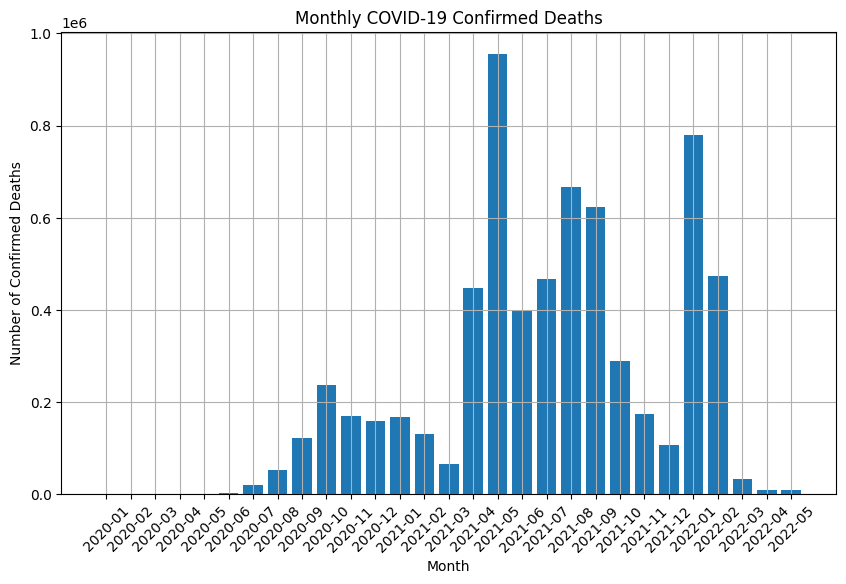

In [8]:
# Group data by month and sum the confirmed deaths
df['month'] = df['Date'].dt.to_period('M')
monthly_deaths = df.groupby('month')['Confirmed'].sum().reset_index()

# Plot the monthly confirmed deaths
plt.figure(figsize=(10, 6))
plt.bar(monthly_deaths['month'].astype(str), monthly_deaths['Confirmed'])
plt.xlabel('Month')
plt.ylabel('Number of Confirmed Deaths')
plt.title('Monthly COVID-19 Confirmed Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
